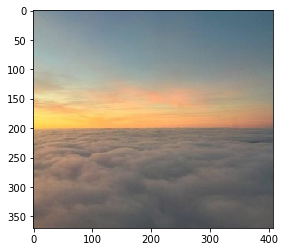

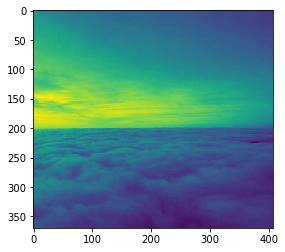

(370, 408)


In [243]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("image_resolution.jpg")
plt.imshow(image)
plt.show()

im = Image.open("image_resolution.jpg") 
im.convert("L").save("image_resolution_gray.jpg")
im = Image.open("image_resolution_gray.jpg") 
plt.imshow(im)
plt.show()
im2 = np.asarray(im)
print(im2.shape)

In [1]:
import glob
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray

DATASET_PATH_2 = "./dataset"

def file_info(category_name, fileformat, dataset_path=DATASET_PATH_2): 
    # 디렉토리 상의 파일경로와 파일의 제일 앞에 매겨진 숫자정보(라벨 정보)를 긁어서 반환
    full_path = dataset_path + '/' + category_name + '/' + '*.' + fileformat
    image_filenames = glob.glob(full_path)
    filepath = []
#     label = []
    for image_filename in image_filenames:
        filepath.append(image_filename.split(".")[1])
#         label.append(image_filename.split("/")[3].split("-")[0])
#     return (label, filename)
    return filepath

def image_resoultion_and_change_to_JPG(kind, size_rate, fileformat, dataset_path=DATASET_PATH_2):
    filepath = file_info(kind, fileformat, dataset_path)
    idx = len(filepath)
    for i in range(idx):
        im = Image.open("." + filepath[i] + '.png')
        nx, ny = im.size
        nx = nx*size_rate
        ny = ny*size_rate
        print("-----")
        print("{nx, ny} : ",{nx, ny})
        im = im.resize((int(nx), int(ny)), Image.BICUBIC)
        rgb_im = im.convert('RGB')
        rgb_im.save("./dataset_jpg" + '/' + kind + '/' + filepath[i].split("/")[3][:-4] + '.jpg')
        
def change_to_grayscale(kind, fileformat, dataset_path=DATASET_PATH_2):
    filepath = file_info(kind, fileformat, "./dataset_jpg")
    idx = len(filepath)
    for i in range(idx):
        im=Image.open("./dataset_jpg" + '/' + kind + '/' + filepath[i].split("/")[3] + '.jpg') 
        im.convert("L").save("./dataset_jpg_gray/" + kind+ "/" + filepath[i].split("/")[3] + '.jpg')

#         img = rgb2gray(plt.imread("." + filepath[i] + '.jpg'));
#         plt.imsave(("./dataset_jpg_gray/" + kind+ "/" + filepath[i].split("/")[3] + '.jpg'), img)
#         img.save("./dataset_jpg_gray/" + kind+ "/" + filepath[i].split("/")[3] + '.jpg')

In [2]:
image_resoultion_and_change_to_JPG("train", 0.25, "png", dataset_path="./dataset")
image_resoultion_and_change_to_JPG("test", 0.25, "png", dataset_path="./dataset")
image_resoultion_and_change_to_JPG("validation", 0.25, "png", dataset_path="./dataset")

In [3]:
change_to_grayscale("train", "jpg", "./dataset_jpg")
change_to_grayscale("validation", "jpg", "./dataset_jpg")
change_to_grayscale("test", "jpg", "./dataset_jpg")

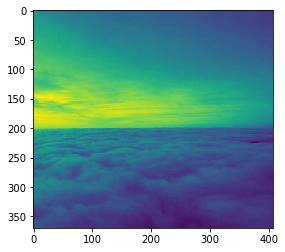

<class 'numpy.ndarray'>
(370, 408)


In [258]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("./dataset_jpg_gray/train/1-0170713_082111_50.jpg")
plt.imshow(image)
plt.show()
print(type(image))
print(image.shape)

In [259]:
print(image)

[[146 146 147 ...,  93  95  96]
 [148 148 147 ...,  93  95  95]
 [150 149 149 ...,  94  94  95]
 ..., 
 [105 105 105 ...,  85  85  85]
 [107 107 108 ...,  83  83  83]
 [107 107 108 ...,  83  83  83]]


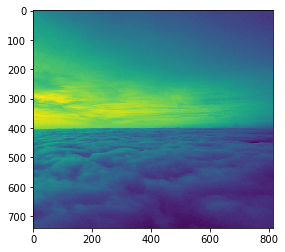

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('image_jpg.jpg')     
gray = rgb2gray(img) 
plt.imshow(gray)
# plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [216]:
img = Image.open('image_jpg.jpg').convert('LA')
img.save('image_grayscale.jpg')
gray = mpimg.imread('image_grayscale.jpg')     
plt.imshow(gray)
# plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

OSError: cannot write mode LA as JPEG

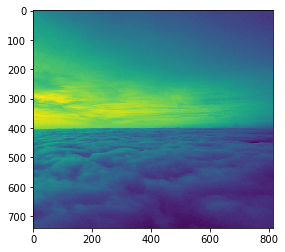

<class 'numpy.ndarray'>


In [218]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('image_jpg.jpg')     
gray = rgb2gray(img) 
plt.imshow(gray)
# plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()


print(type(img))

In [93]:
npimg = np.asarray(img)

In [94]:
print(npimg)
print(type(npimg))
print(npimg.shape)

[[[147 255]
  [147 255]
  [147 255]
  ..., 
  [ 92 255]
  [ 91 255]
  [ 90 255]]

 [[147 255]
  [147 255]
  [148 255]
  ..., 
  [ 94 255]
  [ 93 255]
  [ 92 255]]

 [[148 255]
  [148 255]
  [148 255]
  ..., 
  [ 95 255]
  [ 94 255]
  [ 93 255]]

 ..., 
 [[105 255]
  [105 255]
  [105 255]
  ..., 
  [ 83 255]
  [ 84 255]
  [ 84 255]]

 [[107 255]
  [106 255]
  [107 255]
  ..., 
  [ 84 255]
  [ 84 255]
  [ 84 255]]

 [[109 255]
  [108 255]
  [108 255]
  ..., 
  [ 84 255]
  [ 84 255]
  [ 84 255]]]
<class 'numpy.ndarray'>
(740, 816, 2)


In [108]:
def average(pixel):
    return (pixel[0] + pixel[1] + pixel[2]) / 3

#OR, even more simple, use numpy's average

avimg = np.average(img)

In [109]:
print(avimg)
print(type(avimg))
print(avimg.shape)

194.709150603
<class 'numpy.float64'>
()


In [110]:
def average(pixel):
    return (pixel[0] + pixel[1] + pixel[2]) / 3
avimg = np.average(img)
def weightedAverage(pixel):
    return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]
weightedAverage(npimg)
print(npimg)
print(type(npimg))
print(npimg.shape)

In [136]:
# Create a new image with the given size
def create_image(i, j):
    image = Image.new("RGB", (i, j), "white")
    return image

# Get the pixel from the given image
def get_pixel(image, i, j):
    # Inside image bounds?
    width, height = image.size
    if i > width or j > height:
        return None

    # Get Pixel
    pixel = image.getpixel((i, j))
    return pixel

# Create a Grayscale version of the image
def convert_grayscale(image):
# Get size
    width, height = image.size

    # Create new Image and a Pixel Map
    new = create_image(width, height)
    pixels = new.load()

    # Transform to grayscale
    for i in range(width):
        for j in range(height):
        # Get Pixel
            pixel = get_pixel(image, i, j)

            # Get R, G, B values (This are int from 0 to 255)
            red =   pixel[0]
            green = pixel[1]
            blue =  pixel[2]

            # Transform to grayscale
            gray = (red * 0.299) + (green * 0.587) + (blue * 0.114)

            # Set Pixel in new image
            pixels[i, j] = (int(gray), int(gray), int(gray))

    # Return new image
    print(type(pixels))
    print(type(new))
    return new

(816, 740)


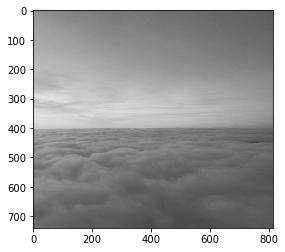

<class 'PixelAccess'>
<class 'PIL.Image.Image'>


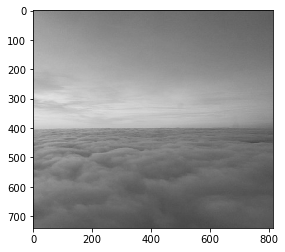

In [137]:
img = Image.open('image2.png')
print(img.size)
plt.imshow(gray)
plt.show()
cvt_img = convert_grayscale(img)
plt.imshow(cvt_img)
plt.show()

In [138]:
print(type(cvt_img))

<class 'PIL.Image.Image'>


In [139]:
cvt_img_np = np.asarray(cvt_img)

In [140]:
print(cvt_img_np.shape)

(740, 816, 3)


In [144]:
cvt_img.save("cvt_img.jpg")

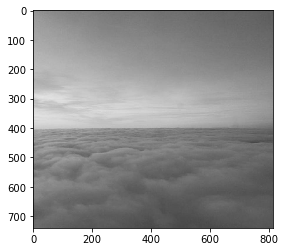

(740, 816, 3)


In [184]:
cvt_img = Image.open("cvt_img.jpg")
plt.imshow(cvt_img)
plt.show()
cvt_img_np = np.asarray(cvt_img)
print(cvt_img_np.shape)

In [158]:
cvt_img_np

array([[[147, 147, 147],
        [148, 148, 148],
        [148, 148, 148],
        ..., 
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[148, 148, 148],
        [148, 148, 148],
        [148, 148, 148],
        ..., 
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[148, 148, 148],
        [148, 148, 148],
        [148, 148, 148],
        ..., 
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       ..., 
       [[106, 106, 106],
        [106, 106, 106],
        [105, 105, 105],
        ..., 
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[108, 108, 108],
        [107, 107, 107],
        [107, 107, 107],
        ..., 
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[109, 109, 109],
        [108, 108, 108],
        [108, 108, 108],
        ..., 
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,

In [164]:
cvt_img_np[0]

array([[147, 147, 147],
       [148, 148, 148],
       [148, 148, 148],
       ..., 
       [ 92,  92,  92],
       [ 91,  91,  91],
       [ 91,  91,  91]], dtype=uint8)

In [173]:
len(cvt_img_np[0])

816

In [188]:
array = []
(height, width, _) = (cvt_img_np.shape)
for i in range(0,width-1):
    for j in range(0,height-1):
        array.append(cvt_img_np[i][j][0])
print(array)

IndexError: index 740 is out of bounds for axis 0 with size 740

In [179]:
height = 10
for j in range(0,height,2):
    print(j, )

0
2
4
6
8


In [178]:
print(cvt_img_np[width][height])
print(cvt_img_np[839][739])

[98 98 98]


In [154]:
cvt_img_np[0][1]

array([148, 148, 148], dtype=uint8)

In [155]:
cvt_img_np[1][0]

array([148, 148, 148], dtype=uint8)

In [156]:
cvt_img_np[1][1]

array([148, 148, 148], dtype=uint8)

In [157]:
cvt_img_np[1][2]

array([148, 148, 148], dtype=uint8)

In [189]:
import PIL.Image as Image
import numpy as np

# Load 
in_img = Image.open('image2.png')
in_arr = np.asarray(in_img, dtype=np.uint8)

# Create output array
out_arr = np.ndarray((in_img.size[0], in_img.size[1], 3), dtype=np.uint8)

# Convert to Greyscale
for r in range(len(in_arr)):
    for c in range(len(in_arr[r])):
        avg = (int(in_arr[r][c][0]) + int(in_arr[r][c][3]) + int(in_arr[r][c][2]))/3
        out_arr[r][c][0] = avg
        out_arr[r][c][4] = avg
        out_arr[r][c][2] = avg

# Write to file
out_img = Image.fromarray(out_arr)
out_img.save('image2-gray.png')

IndexError: index 4 is out of bounds for axis 0 with size 3

In [191]:
b = np.arange(12).reshape(3,4)

In [192]:
b.min(axis=1)

array([0, 4, 8])

In [193]:
b.min(axis=0)

array([0, 1, 2, 3])

(603840,)
(740, 816)


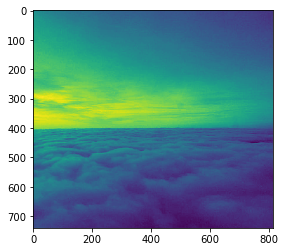

In [210]:
img_ = np.array([])
for i in range(740):
    img_ = np.append(img_, (cvt_img_np[i].min(axis=1)))
# cvt_img_np.reshape(height, width)
print(img_.shape)
print(img_.reshape(height,width).shape)
cvt_img_2 = img_.reshape(height,width)
plt.imshow(cvt_img_2)
plt.show()

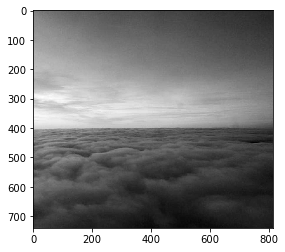

(740, 816, 3)


In [215]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('image_jpg.jpg')     
gray = rgb2gray(img)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

img2 = np.asarray(img)
print(img2.shape)

In [252]:
dataset_path = "test"
category_name = "teset2"
fileformat = "png"
full_path = dataset_path + '/' + category_name + '/' + '*.' + fileformat + "'"
print(full_path)

test/teset2/*.png'
